In [1]:
#!pip install sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.metrics import mean_squared_error
 
from simple_rnn import train, hidden_dim, seq_len, sigmoid, output_dim

In [3]:
sin_wave = np.array([math.sin(x) for x in range(200)])

# training data

X = []
Y = []

num_records = len(sin_wave) - seq_len # 50
 
# X entries are 50 data points
# Y entries are the 51st data point

#Vector entrada X [-1,-0.5,0,0.5,1,0.5] [??]

for i in range(num_records-50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])

    
X = np.expand_dims(np.array(X), axis=2) # 100 x 50 x 1
Y = np.expand_dims(np.array(Y), axis=1) # 100 x 1
print(X.shape)
print(Y.shape)

# validation data
X_validation = []
Y_validation = []
for i in range(num_records-seq_len, num_records):
    X_validation.append(sin_wave[i:i+seq_len])
    Y_validation.append(sin_wave[i+seq_len])
    
X_validation = np.expand_dims(np.array(X_validation), axis=2)

Y_validation = np.expand_dims(np.array(Y_validation), axis=1)


(100, 50, 1)
(100, 1)


In [4]:
X.shape

(100, 50, 1)

In [5]:
Y.shape

(100, 1)

In [6]:
#inicialización de las matrices de pesos

np.random.seed(12161)
U = np.random.uniform(0, 1, (hidden_dim, seq_len)) # weights from input to hidden layer
print(U.shape)
W = np.random.uniform(0, 1, (hidden_dim, hidden_dim)) # recurrent weights for layer (RNN weigts)
print(W.shape)

#print("h.shape ", activation.shape)

V = np.random.uniform(0, 1, (output_dim, hidden_dim)) # weights from hidden to output layer
print(V.shape)






(100, 50)
(100, 100)
(1, 100)


In [7]:
hidden_dim = 100

#h^{0}
prev_activation = np.zeros((hidden_dim, 1))

x = X[0]

timestep = 10

new_input = np.zeros(x.shape)

new_input[timestep] = x[timestep] # define a single input for that timestep

print(U.shape , "x", new_input.shape, " = ", np.dot(U,new_input).shape)


mulw = np.dot(W, prev_activation)
#_sum = mulu + mulw
print(_sum.shape , "sum")
            
#eq 10.9
activation = sigmoid(_sum)
            
#eq 10.10
mulv = np.dot(V, activation)
print(V.shape , "x", activation.shape, " = ", mulv.shape)


(100, 50) x (50, 1)  =  (100, 1)


NameError: name '_sum' is not defined

In [8]:
Y.shape[0]

100

In [9]:
U, V, W = train(U, V, W, X, Y, X_validation, Y_validation)

Epoch: 1, Costo Entrenamiento: 125967.55155852718, Costo Validación: 62981.80009873551


/Users/rodrigo/Documents/SourcesCodes/GitHub/aprendizaje profundo centrogeo/simple_rnn.py:154: RuntimeWarning: overflow encountered in multiply
  d_a = a * (1 - a) * ds
/Users/rodrigo/Documents/SourcesCodes/GitHub/aprendizaje profundo centrogeo/simple_rnn.py:16: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Epoch: 2, Costo Entrenamiento: 153510.2115628537, Costo Validación: 76752.92885206162
Epoch: 3, Costo Entrenamiento: 183774.39667152843, Costo Validación: 91884.82015709793
Epoch: 4, Costo Entrenamiento: 216760.1262409844, Costo Validación: 108377.48369205788
Epoch: 5, Costo Entrenamiento: 252467.41979768896, Costo Validación: 126230.92922017189
Epoch: 6, Costo Entrenamiento: 290896.29704810074, Costo Validación: 145445.1665946661
Epoch: 7, Costo Entrenamiento: 332046.7778820432, Costo Validación: 166020.20576044914
Epoch: 8, Costo Entrenamiento: 375918.88237893325, Costo Validación: 187956.05675722603
Epoch: 9, Costo Entrenamiento: 422512.6308139599, Costo Validación: 211252.72972258783
Epoch: 10, Costo Entrenamiento: 471828.0436582966, Costo Validación: 235910.23489211802
Epoch: 11, Costo Entrenamiento: 523865.1415865306, Costo Validación: 261928.58260310645
Epoch: 12, Costo Entrenamiento: 578623.9454718978, Costo Validación: 289307.7832921679
Epoch: 13, Costo Entrenamiento: 636104.4

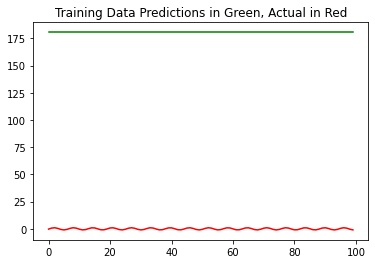

In [10]:
# predictions on the training set
predictions = []
for i in range(Y.shape[0]):
    x, y = X[i], Y[i]
    prev_activation = np.zeros((hidden_dim,1))
    # forward pass
    for timestep in range(seq_len):
        mulu = np.dot(U, x)
        mulw = np.dot(W, prev_activation)
        _sum = mulu + mulw
        activation = sigmoid(_sum)
        mulv = np.dot(V, activation)
        prev_activation = activation
    predictions.append(mulv)
 
predictions = np.array(predictions)
 
plt.plot(predictions[:, 0,0], 'g')
plt.plot(Y[:, 0], 'r')
plt.title("Training Data Predictions in Green, Actual in Red")
plt.show()

In [ ]:
#https://pythonalgos.com/build-a-recurrent-neural-network-from-scratch-in-python-3/#introduction-to-recurrent-neural-networks

#https://towardsdatascience.com/backpropagation-in-rnn-explained-bdf853b4e1c2#:~:text=You%20see%2C%20a%20RNN%20essentially,where%20they%20are%20summed%20up.
#https://pythonalgos.com/build-a-recurrent-neural-network-from-scratch-in-python-3/#introduction-to-recurrent-neural-networks

#no tan buena introducción

#https://machinelearningmastery.com/gentle-introduction-backpropagation-time/

In [59]:
np.arange(100)*np.ones_like(W)

array([[ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       ...,
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.],
       [ 0.,  1.,  2., ..., 97., 98., 99.]])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])